In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

total on grid:  1.0
total on grid:  311.0
total on grid:  1318.0
total on grid:  3069.0


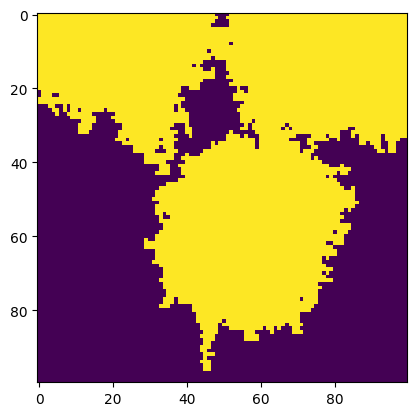

In [48]:
# diffusion limited agregation
steps = 10
size = 100
standard_deviation = 1000

grid = np.zeros((size,size))
grid_probs = np.zeros((size,size))

# multivariate normal distribution with mean at center of grid
for i in range(size):
    for j in range(size):
        grid_probs[i,j] = np.exp(-((i-size//2)**2 + (j-size//2)**2)/standard_deviation)

grid_probs = grid_probs/np.sum(grid_probs)
# plt.imshow(grid_probs)

grid[size//2,size//2] = 1

particle_spawn_p = 0.005

for i in range(steps):
    if i%10 == 0:
        print(i, end="\r")
        print("total on grid: ", np.sum(grid))


    for l in range(size):
        if np.random.random() < particle_spawn_p:
            if np.random.random() < 0.0005:
                grid[l,0] = 1
            else:
                grid[0,l] = 1

    for j in range(size):
        for k in range(size):
            if grid[j,k] == 1:
                # probs = np.array([grid_probs[j-1,k], grid_probs[j+1,k], grid_probs[j,k-1], grid_probs[j,k+1]])
                probs = np.array([grid_probs[max(j-1,0),k], grid_probs[min(j+1,size-1),k], grid_probs[j,max(k-1,0)], grid_probs[j,min(k+1,size-1)]])
                probs = probs/np.sum(probs)

                if j > 0:
                    if grid[j-1,k] == 0:
                        if np.random.random() < probs[0]:
                            grid[j-1,k] = 1
                if j < size-1:
                    if grid[j+1,k] == 0:
                        if np.random.random() < probs[1]:
                            grid[j+1,k] = 1
                if k > 0:
                    if grid[j,k-1] == 0:
                        if np.random.random() < probs[2]:
                            grid[j,k-1] = 1
                if k < size-1:
                    if grid[j,k+1] == 0:
                        if np.random.random() < probs[3]:
                            grid[j,k+1] = 1

plt.imshow(grid)


10
20


KeyboardInterrupt: 

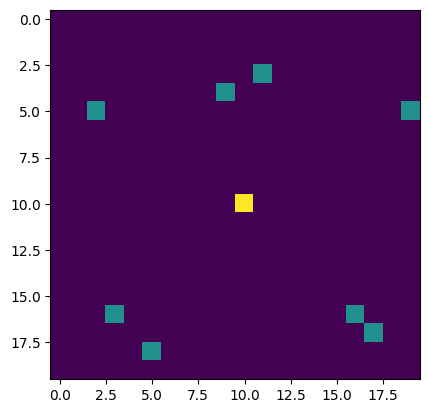

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams["animation.html"] = "jshtml"

fps = 30
sec_length = 10
steps = fps * sec_length
cur_frame = 0
interval = 1000 / fps
size = 20
standard_deviation = 1000

grid = np.zeros((size, size), dtype=int)
grid[size // 2, size // 2] = 2
grid_probs = np.zeros((size, size))

# multivariate normal distribution with mean at center of grid
for i in range(size):
    for j in range(size):
        grid_probs[i, j] = np.exp(
            -((i - size // 2) ** 2 + (j - size // 2) ** 2) / standard_deviation
        )

grid_probs = grid_probs / np.sum(grid_probs)

spawn_delay = 1
spawn_amount = 1

fig, ax = plt.subplots()
im = ax.imshow(np.zeros((size, size), dtype=int), cmap='binary', animated=True)

def rulebook(grid, grid_probs, size, spawn_delay, spawn_amount):
    new_grid = grid.copy()
    for i in range(size):
        for j in range(size):
            if grid[i, j] == 2:
                continue
            if grid[i, j] == 1:
                neighbors = [
                    grid[max(i - 1, 0), j],
                    grid[min(i + 1, size - 1), j],
                    grid[i, max(j - 1, 0)],
                    grid[i, min(j + 1, size - 1)]
                ]
                if 2 in neighbors:
                    grid[i, j] = 2
                else:
                    probs = [
                        grid_probs[max(i - 1, 0), j],
                        grid_probs[min(i + 1, size - 1), j],
                        grid_probs[i, max(j - 1, 0)],
                        grid_probs[i, min(j + 1, size - 1)]
                    ]
                    probs = probs / np.sum(probs)
                    rand_move = np.random.choice([0, 1, 2, 3], p=probs)
                    if rand_move == 0:
                        new_grid[max(i - 1, 0), j] = 1
                        new_grid[i, j] = 0
                    elif rand_move == 1:
                        new_grid[min(i + 1, size - 1), j] = 1
                        new_grid[i, j] = 0
                    elif rand_move == 2:
                        new_grid[i, max(j - 1, 0)] = 1
                        new_grid[i, j] = 0
                    elif rand_move == 3:
                        new_grid[i, min(j + 1, size - 1)] = 1
                        new_grid[i, j] = 0

    plt.imshow(new_grid)
    return new_grid

def update(frame):
    global grid, grid_probs, size, spawn_delay, spawn_amount, cur_frame
    frame += 1
    if frame % 10 == 0:
        print(frame)
    if frame % spawn_delay == 0:
        current_fill_percentage = np.count_nonzero(grid) / (size * size)
        spawn_probability = 1.0 / (1.0 + np.exp(10.0 * (current_fill_percentage - 0.5)))
        for _ in range(spawn_amount):
            side = np.random.randint(0, 4)
            if side == 0 and np.random.random() < spawn_probability:
                grid[0, np.random.randint(0, size)] = 1
            elif side == 1 and np.random.random() < spawn_probability:
                grid[size - 1, np.random.randint(0, size)] = 1
            elif side == 2 and np.random.random() < spawn_probability:
                grid[np.random.randint(0, size), 0] = 1
            elif side == 3 and np.random.random() < spawn_probability:
                grid[np.random.randint(0, size), size - 1] = 1
    grid = rulebook(grid, grid_probs, size, spawn_delay, spawn_amount)
    im.set_array(grid)
    return im,

anim = FuncAnimation(fig, update, frames=steps, interval=interval, blit=True)
anim.save('simulation_animation.mp4', writer='ffmpeg', dpi=90)

from IPython.display import HTML
HTML(anim.to_jshtml())
